<a href="https://colab.research.google.com/github/EdinsonSanchez/-Mirai-Iot-BotNet/blob/master/notebooks/ml_chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
class Perceptron(object):
  """Perceptron classifier.
  
  Parameters
  -----------

  eta : float
    Learning rate (between 0.0 and 1.0)
  n_iter: int
    Passes over the training dataset.
  
  Attributes
  -----------

  w_ : 1d-array
    Weights after fitting.
  errors_ : list
    Number of misclassifications in every epoch.
  """
  def __init__(self, eta=0.01, n_iter=10):
    self.eta = eta
    self.n_iter = n_iter
  
  def fit(self, x, y):
    """Fit training data.
    
    Parameters
    -----------

    x : {array-like}, shape = [n_samples, n_features]
      Training vectors, where n_samples
      is the number of samples and
      n_features is the number of features.
    y : array-like, shape = [n_samples]
      Target values.
    
    Returns
    --------
    self : object
    """
    self.w_ = np.zeros(1 + x.shape[1])
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(x, y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self
  
  def net_input(self, x):
    """Calculate net input"""
    return np.dot(x, self.w_[1:]) + self.w_[0]

  def predict(self, x):
    """Return class label after unit step"""
    return np.where(self.net_input(x) >= 0.0, 1, -1)


Load the Iris dataset directly from the *UCI Machine Learning Repository* into a *DataFrame* object and print the last five lineas via the *tail* method to check that the data was loaded correctly.

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [0]:
import matplotlib.pyplot as plt
import numpy as np

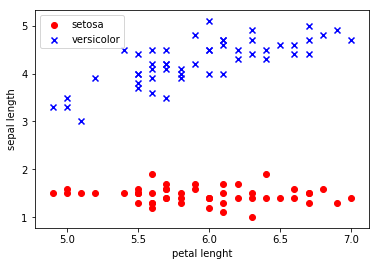

In [4]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
x = df.iloc[0:100, [0, 2]].values
plt.scatter(x[50:100, 0], x[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal lenght')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

Now, it's time to train our perceptron algorithm on the Iris data subset that we just extracted. Also, we will plot the *misclassification error* for each epoch to check if the algorithm converged and found a decision boundary that separates the two Iris flower classes.

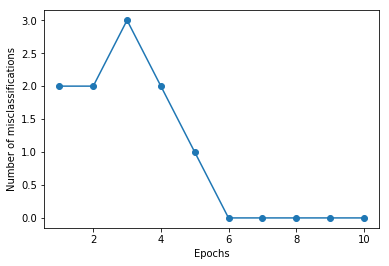

In [12]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(x, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

After executing we should see the plot of the misclassification errors versus the number of epochs, as shown before. And as we see in the proceding plot, our perceptron already converged after the sixth epoch and should now be able to classify the training samples perfectly.

In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(x, y, classifier, resolution=0.02):

  # setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
  x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  z = z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # plot class samples
  for idx, c1 in enumerate(np.unique(y)):
    plt.scatter(x=x[y == c1, 0], y=x[y == c1, 1],
                alpha=0.8, c=cmap(idx),
                marker=markers[idx], label=c1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


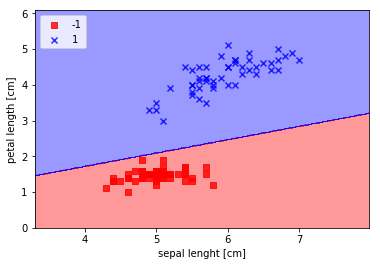

In [18]:
plot_decision_regions(x, y, classifier=ppn)
plt.xlabel('sepal lenght [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## Adaptative linear neurons and the convergence of learning